In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier  # Use RandomForestRegressor for regression
from sklearn.metrics import accuracy_score, classification_report

Combine metadata with random Group with mater metadata!

In [22]:
from sklearn.model_selection import cross_val_score, PredefinedSplit
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [ ]:
splitdf =  pd.read_csv("../RData/metadata_randomGroup.csv")
#splitdf.head()
mast_metadf =  pd.read_csv("../RData/master_metadata.csv")

metadf = pd.merge(mast_metadf, splitdf[['Group', 'mRNA']], on="mRNA", how='left')
metadf.head()

(763, 2003)
(763, 2003)


,mRNA,PAM50,TumorPurity,ProliferationScore,ER,PR,HER2,file_name_head,dataset,bcr_patient_barcode,hr_missing,Group
0,TCGA-B6-A0IG-01A-11R-A034-07,LumA,0.73,-0.568397,Positive,Positive,Positive,281a89c1-e817-49d4-afa1-2894c2747919,lobular,TCGA-B6-A0IG,False,2
1,TCGA-BH-A0HQ-01A-11R-A034-07,LumA,0.52,-0.821974,Positive,Positive,Negative,c861f2ac-61fd-45cc-9e14-f775f9eed494,lobular,TCGA-BH-A0HQ,True,6
2,TCGA-BH-A18G-01A-11R-A12D-07,Basal,0.79,0.423067,Negative,Negative,Negative,deb7967f-9339-4bb1-ae0b-81a72a472bba,lobular,TCGA-BH-A18G,False,2
3,TCGA-A8-A09K-01A-11R-A00Z-07,LumA,1.00,0.026868,Positive,Positive,Negative,4ab26a32-f816-4aee-9130-12a0b3604db0,lobular,TCGA-A8-A09K,False,5
4,TCGA-BH-A0BZ-01A-31R-A12P-07,LumB,0.37,0.247682,Positive,Positive,Negative,707fad7d-f284-456a-abfa-17289b40579f,lobular,TCGA-BH-A0BZ,False,2


In [60]:
#drop ER from df and update with metadf
df = pd.read_csv("../RData/NoOutlier_filtered_normalized.csv")
print(df.shape)
fulldf = pd.merge(df.drop(columns="ER"), metadf[['Group', 'mRNA','ER']], on="mRNA", how='left')
fulldf.set_index("mRNA", inplace=True)
fulldf.head()

(763, 2003)


,ENSG00000110484,ENSG00000173467,ENSG00000160180,ENSG00000106541,ENSG00000086548,ENSG00000186081,ENSG00000164128,ENSG00000082175,ENSG00000012223,ENSG00000151892,...,ENSG00000083444,ENSG00000077238,ENSG00000131378,ENSG00000162627,ENSG00000172428,ENSG00000090238,ENSG00000121310,PAM50,Group,ER
mRNA,,,,,,,,,,,,,,,,,,,,,
TCGA-B6-A0IG-01A-11R-A034-07,16.604568,13.223057,16.503468,16.406028,16.432548,12.923043,6.321402,10.431743,12.610098,15.059847,...,13.235186,12.394746,9.942146,8.553333,11.502764,10.531759,10.892306,LumA,2,Positive
TCGA-BH-A0HQ-01A-11R-A034-07,17.999684,12.796037,15.401028,15.135256,10.963789,13.592751,9.657230,13.523402,13.761161,15.761459,...,13.502874,12.193215,11.164268,10.274965,10.937427,11.517999,12.172644,LumA,6,Positive
TCGA-BH-A18G-01A-11R-A12D-07,11.449702,3.660178,0.000000,5.166983,10.137522,10.144959,14.228891,5.449170,18.585784,8.618219,...,15.340948,12.148326,10.899602,10.838234,11.463646,12.285856,10.922859,Basal,2,Negative
TCGA-A8-A09K-01A-11R-A00Z-07,1.675843,13.126475,10.825054,12.800465,4.375425,7.437230,11.509252,9.890669,9.995210,16.164904,...,11.836395,9.202800,9.810061,10.297798,11.573526,12.778097,12.220035,LumA,5,Positive
TCGA-BH-A0BZ-01A-31R-A12P-07,8.222050,11.830127,12.560654,14.547573,9.016715,11.662777,9.213446,7.501901,7.631275,14.109405,...,13.686927,12.581818,11.524712,9.752092,10.692426,11.690135,10.532674,LumB,2,Positive


In [76]:
#Saving Test Values
testdf = fulldf[fulldf["Group"] == 6]
test_X = testdf.drop(columns=["PAM50", "ER", "Group"])

In [20]:
#Removing all test values from dataframe
traindf = fulldf[fulldf["Group"] != 6]
fulldf.shape

(763, 2003)

In [21]:
#Making the group column zero index
fulldf["Group"] = fulldf["Group"] - 1

In [8]:
#Setting up X and y
X5 = fulldf.drop(columns=["PAM50","ER","Group"]) 
y5 = fulldf["ER"] 

Fitting the Final Model (One without outliers on the filtered gene expression data) and Predicting all Missing ER Values

In [23]:
#Fitting Final Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X5, y5)

RandomForestClassifier(random_state=42)

In [24]:
#Predicting all Missing Values
missingvalpred = rf.predict(test_X)

In [100]:
test_predicted = pd.DataFrame(missingvalpred, columns=["ER_RF"])
test_predicted["mRNA"] = test_X.index
test_predicted = pd.merge(test_predicted, testdf[['ER']].reset_index(), on="mRNA", how='left')

In [101]:
test_predicted

,ER_RF,mRNA,ER
0,Positive,TCGA-BH-A0HQ-01A-11R-A034-07,Positive
1,Positive,TCGA-A1-A0SD-01A-11R-A115-07,Positive
2,Positive,TCGA-A2-A0CQ-01A-21R-A034-07,Positive
3,Positive,TCGA-A2-A0CS-01A-11R-A115-07,Positive
4,Positive,TCGA-A2-A0YC-01A-11R-A109-07,Positive
...,...,...,...
106,Positive,TCGA-D8-A1XC-01A-11R-A14D-07,Positive
107,Positive,TCGA-E2-A14T-01A-11R-A115-07,Positive
108,Negative,TCGA-E2-A1LG-01A-21R-A14M-07,Negative
109,Positive,TCGA-E9-A54X-01A-11R-A266-07,Positive


In [102]:
print(f"{(test_predicted['ER_RF'] == test_predicted['ER']).sum()} out of {len(test_predicted)} are correct")

101 out of 111 are correct


In [103]:
def check_difference(row):
    if row['ER_RF'] == row['ER']:
        return row['ER']
    elif row['ER'] == 'Positive':
        return "FN (predicted Negative)"
    elif row['ER'] == 'Negative':
        return "FP (predicted Positive)"
    else:
        return -1 

test_predicted['match_code'] = test_predicted.apply(check_difference, axis=1)

In [104]:
test_predicted

,ER_RF,mRNA,ER,match_code
0,Positive,TCGA-BH-A0HQ-01A-11R-A034-07,Positive,Positive
1,Positive,TCGA-A1-A0SD-01A-11R-A115-07,Positive,Positive
2,Positive,TCGA-A2-A0CQ-01A-21R-A034-07,Positive,Positive
3,Positive,TCGA-A2-A0CS-01A-11R-A115-07,Positive,Positive
4,Positive,TCGA-A2-A0YC-01A-11R-A109-07,Positive,Positive
...,...,...,...,...
106,Positive,TCGA-D8-A1XC-01A-11R-A14D-07,Positive,Positive
107,Positive,TCGA-E2-A14T-01A-11R-A115-07,Positive,Positive
108,Negative,TCGA-E2-A1LG-01A-21R-A14M-07,Negative,Negative
109,Positive,TCGA-E9-A54X-01A-11R-A266-07,Positive,Positive


In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import plotly.express as px
import seaborn as sns
def plot_pca(data, num_components, mode = "ER", pcs = [1,2], title = "Genes", scale = 7000):
    #PCA on all Genes
    pca = PCA(n_components = num_components) 
    pca_result = pca.fit_transform(data.drop(columns=[mode, 'PAM50']))

    if mode == "ER" or mode == "match_code":
        color_map = {'Positive': 'skyblue', 'Negative': 'pink', 'FP (predicted Positive)': 'blue', 'FN (predicted Negative)': 'red'}
        color_plotly = data[mode].fillna('missing')
        color_values = data[mode].map(color_map).fillna('black')
        blue_patch = mpatches.Patch(color='blue', label='FP (predicted Positive)')
        red_patch = mpatches.Patch(color='red', label='FN (predicted Negative)')
        pink_patch = mpatches.Patch(color='pink', label='ER Negative')
        skyblue_patch = mpatches.Patch(color='skyblue', label='ER Positive')
        patches = [red_patch, blue_patch, pink_patch, skyblue_patch]
    else:
        color_map = {'LumA': "blue", 'LumB': "green",'Her2': "pink", "Basal":"red", "Normal": "black"}
        color_plotly = data['PAM50']

    
    print("Explained variance ratio by each component:")
    print(pca.explained_variance_ratio_)

    if len(pcs) != 2:
        pca_df = pd.DataFrame(data=pca_result, columns= [f"PC {i+1} ({var:.1f}%)" for i, var in enumerate(pca.explained_variance_ratio_ * 100)])
        pca_df['label'] = color_plotly.values
        g = sns.pairplot(
            pca_df,
            hue='label',
            corner=True,
            palette= color_map,
            aspect=1.5
        )
        for text in g._legend.texts:
            text.set_fontsize(12)
        g._legend.get_title().set_fontsize(14)

        loadings = pca.components_  # shape: (4, num_features)
        features = [f"gene {i+1}" for i in range(5)]

        ax = g.axes[1, 0]  
        for i, feature in enumerate(features):
            x = loadings[0, i] * scale
            y = loadings[1, i] * scale
            pos = 100 if scale == 7000 else 30
            ax.arrow(pos, pos,x, y, color='black', alpha=0.7, head_width=0.1)
            ax.text(pos+1.1* x, pos+ 1.1*y, feature, color='black', fontsize=9)

        plt.show()
    else:
        pca_df = pd.DataFrame(data=pca_result, columns= [f"PC{i+1}" for i, var in enumerate(pca.explained_variance_ratio_ * 100)])

        plt.figure(figsize=(8, 6))
        plt.scatter(pca_df[f'PC{pcs[0]}'], pca_df[f'PC{pcs[1]}'], c= color_values)
        plt.title(f"PCA Results on {title}")
        plt.xlabel(f"Principal Component {pcs[0]}")
        plt.ylabel(f"Principal Component {pcs[1]}")
        plt.legend(handles=patches, loc='upper right', bbox_to_anchor=(1.15, 1))

        plt.show()
    

    return pca_df

In [110]:
test_pca = pd.merge(test_predicted[['match_code', 'mRNA']], df.drop(columns=['ER']), on="mRNA", how='left')
test_pca.set_index("mRNA", inplace=True)

Explained variance ratio by each component:
[0.20021895 0.11709507]


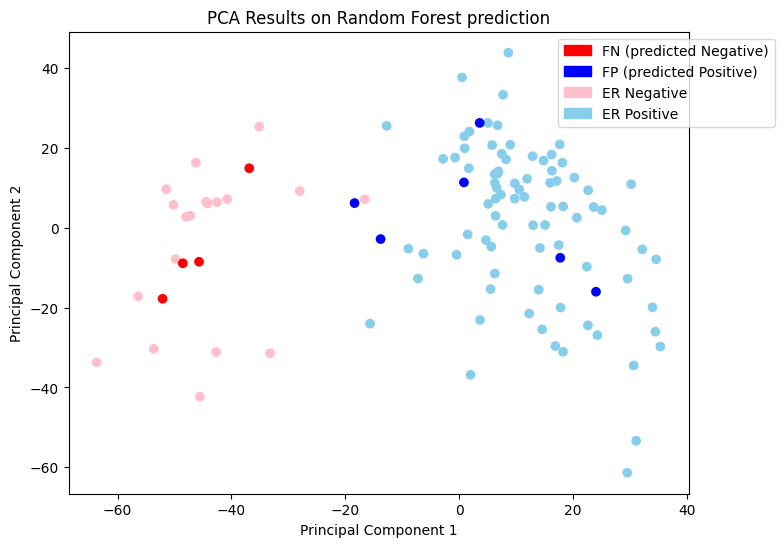

In [113]:
pca_df = plot_pca(test_pca, 2, pcs = [1,2],mode = 'match_code', title = "Random Forest prediction", scale = 200)